## Полиномиальная аппроксимация распределения выборки с использованием метода градиентного спуска

In [271]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [272]:
# Задаем параметры для генерации данных
m = 100
min_value = -10
max_value = 10

In [273]:
# Генерируем тензор x_uniform с равномерным распределением значений
x_uniform = tf.random.uniform((m,), minval=min_value, maxval=max_value, dtype=tf.float32)
# Генерируем тензор x_normal с нормальным распределением значений
x_normal = tf.random.normal((m,), mean=0, stddev=5, dtype=tf.float32)

In [274]:
# Задаем истинные значения параметров для квадратичной функции
k1_true = 0.5
k0_true = 1.0
b_true = -0.7

In [275]:
# Генерируем целевые переменные y с добавлением шума
y_true_normal = k1_true * x_normal**2 + k0_true * x_normal + b_true + tf.random.normal((m,), mean=0, stddev=2)
y_true_uniform = k1_true * x_uniform**2 + k0_true * x_uniform + b_true + tf.random.normal((m,), mean=0, stddev=2)

In [276]:
# Инициализируем переменные (веса модели) для градиентного спуска. Они будут обновляться в процессе обучения.
k1_normal = tf.Variable(tf.random.normal((1,), dtype=tf.float32), name='k1')
k0_normal = tf.Variable(tf.random.normal((1,), dtype=tf.float32), name='k0')
b_normal = tf.Variable(tf.random.normal((1,), dtype=tf.float32), name='b')
k1_uniform = tf.Variable(tf.random.uniform((1,), dtype=tf.float32), name='k1_uniform')
k0_uniform = tf.Variable(tf.random.uniform((1,), dtype=tf.float32), name='k0_uniform')
b_uniform = tf.Variable(tf.random.uniform((1,), dtype=tf.float32), name='b_uniform')

In [277]:
# Определяем модель - квадратичную функцию
def model(x, k1, k0, b):
    return k1 * x**2 + k0 * x + b

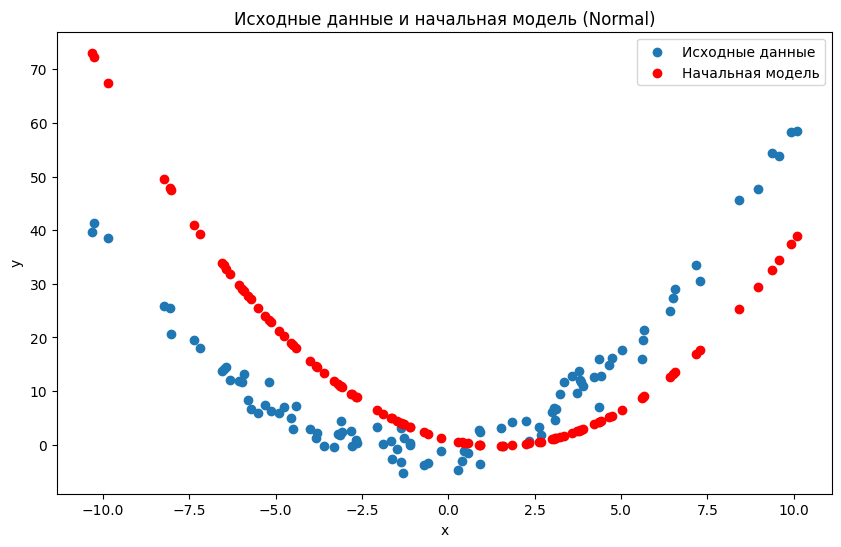

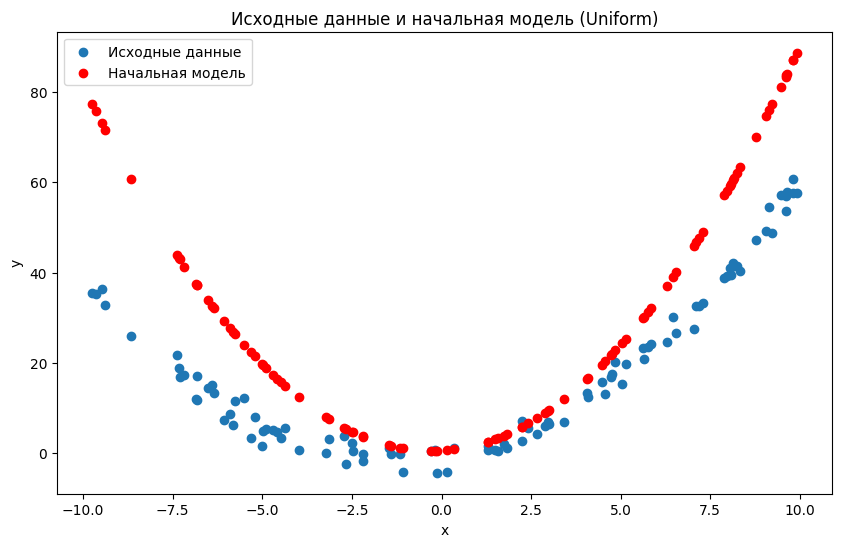

In [278]:
# Функция для построения графиков исходных данных
def plot_initial(x, y_true, k1, k0, b, distribution_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(x.numpy(), y_true.numpy(), label='Исходные данные')
    plt.scatter(x.numpy(), model(x, k1, k0, b).numpy(), label='Начальная модель', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Исходные данные и начальная модель ({distribution_name})')
    plt.legend()
    plt.show()

plot_initial(x_normal, y_true_normal, k1_normal, k0_normal, b_normal, "Normal")
plot_initial(x_uniform, y_true_uniform, k1_uniform, k0_uniform, b_uniform, "Uniform")

In [279]:
# Определяем функцию потерь - среднеквадратичное отклонение
def loss_function(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [280]:
# Задаем параметры обучения
learning_rate = 0.0001
epochs = 1500

In [281]:
# Создаем оптимизаторы (алгоритмы градиентного спуска)
optimizer_normal = tf.keras.optimizers.SGD(learning_rate=learning_rate)
optimizer_uniform = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [ ]:
# Функция для обучения модели методом градиентного спуска
def train_model(x, y_true, k1, k0, b, optimizer, epochs):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x, k1, k0, b)
            loss = loss_function(y_true, y_pred)
            if tf.math.is_inf(loss):
                print(f"Loss is inf at epoch {epoch}, k1={k1.numpy()}, k0={k0.numpy()}, b={b.numpy()}")
                break
        gradients = tape.gradient(loss, [k1, k0, b])
        optimizer.apply_gradients(zip(gradients, [k1, k0, b]))
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')
    return k1, k0, b

print("Обучение модели для нормального распределения")
k1_normal, k0_normal, b_normal = train_model(x_normal, y_true_normal, k1_normal, k0_normal, b_normal, optimizer_normal, epochs)

print("Обучение модели для равномерного распределения")
k1_uniform, k0_uniform, b_uniform = train_model(x_uniform, y_true_uniform, k1_uniform, k0_uniform, b_uniform, optimizer_uniform, epochs)

Обучение модели для нормального распределения
Epoch 0, Loss: 178.9174346923828
Epoch 100, Loss: 66.21874237060547
Epoch 200, Loss: 27.989604949951172
Epoch 300, Loss: 14.011441230773926
Epoch 400, Loss: 8.887258529663086
Epoch 500, Loss: 6.995917797088623
Epoch 600, Loss: 6.285261631011963
Epoch 700, Loss: 6.006072998046875
Epoch 800, Loss: 5.884824752807617
Epoch 900, Loss: 5.8216471672058105
Epoch 1000, Loss: 5.780070781707764
Epoch 1100, Loss: 5.746774673461914
Epoch 1200, Loss: 5.716884136199951
Epoch 1300, Loss: 5.6886138916015625
Epoch 1400, Loss: 5.6613030433654785
Обучение модели для равномерного распределения
Epoch 0, Loss: 293.8771667480469
Epoch 100, Loss: 8.949272155761719
Epoch 200, Loss: 5.799920558929443
Epoch 300, Loss: 4.961370944976807
Epoch 400, Loss: 4.731811046600342
Epoch 500, Loss: 4.66284704208374
Epoch 600, Loss: 4.636331081390381
Epoch 700, Loss: 4.621133804321289
Epoch 800, Loss: 4.609052658081055
Epoch 900, Loss: 4.5979204177856445
Epoch 1000, Loss: 4.587166

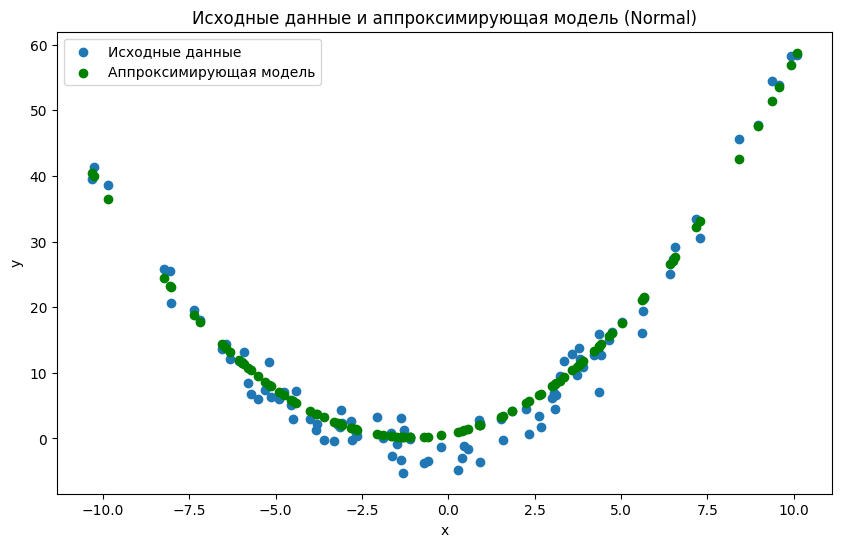

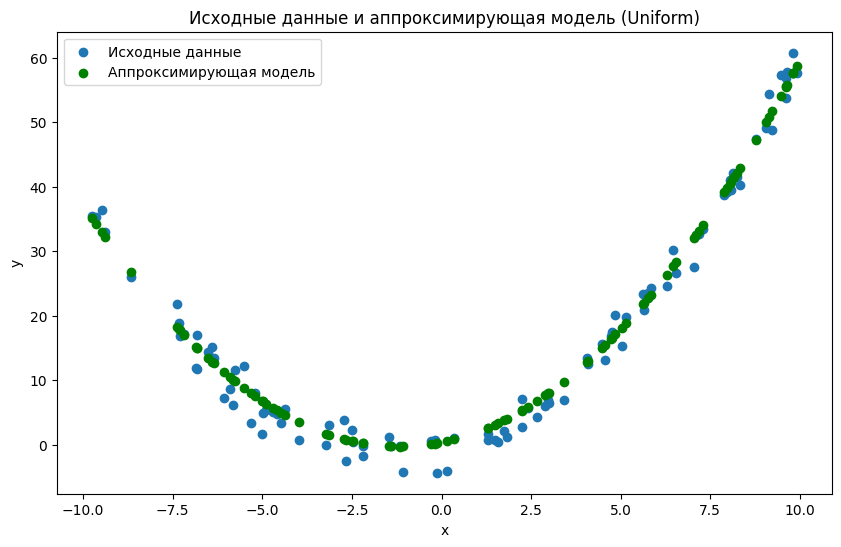

In [283]:
# Функция для построения графиков результатов
def plot_results(x, y_true, k1, k0, b, distribution_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(x.numpy(), y_true.numpy(), label='Исходные данные')
    plt.scatter(x.numpy(), model(x, k1, k0, b).numpy(), label='Аппроксимирующая модель', color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Исходные данные и аппроксимирующая модель ({distribution_name})')
    plt.legend()
    plt.show()

plot_results(x_normal, y_true_normal, k1_normal, k0_normal, b_normal, "Normal")
plot_results(x_uniform, y_true_uniform, k1_uniform, k0_uniform, b_uniform, "Uniform")

In [284]:
print(f'Обученные параметры (нормальное распределение): k1 = {k1_normal.numpy()[0]}, k0 = {k0_normal.numpy()[0]}, b = {b_normal.numpy()[0]}')
print(f'Истинные параметры: k1 = {k1_true}, k0 = {k0_true}, b = {b_true}')
print(f'Обученные параметры (равномерное распределение): k1 = {k1_uniform.numpy()[0]}, k0 = {k0_uniform.numpy()[0]}, b = {b_uniform.numpy()[0]}')
print(f'Истинные параметры: k1 = {k1_true}, k0 = {k0_true}, b = {b_true}')

Обученные параметры (нормальное распределение): k1 = 0.47128817439079285, k0 = 1.004885196685791, b = 0.7043942809104919
Истинные параметры: k1 = 0.5, k0 = 1.0, b = -0.7
Обученные параметры (равномерное распределение): k1 = 0.4801640510559082, k0 = 1.1212793588638306, b = 0.3808355927467346
Истинные параметры: k1 = 0.5, k0 = 1.0, b = -0.7
